In [24]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_csv('msft.csv')

df.columns = ['Date', 'Open', 'High', 'Low', 'Close', "Volume"]

#print the head
df.head()

,Date,Open,High,Low,Close,Volume
0,2000-01-18,111.81,116.50,111.75,115.31,40741800.0
1,2000-01-19,110.50,111.50,106.00,107.00,48784100.0
2,2000-01-20,107.06,109.69,105.87,106.00,28174900.0
3,2000-01-21,107.00,107.25,103.25,103.75,34208100.0
4,2000-01-24,103.80,105.69,100.81,101.25,31798800.0


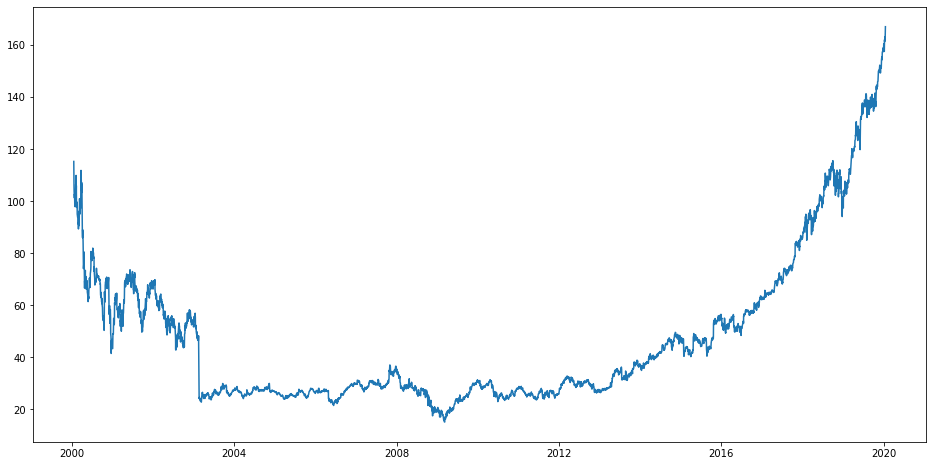

In [25]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [26]:
#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

In [27]:
train = new_data[:-1000]
valid = new_data[-1000:]

train.shape

(4033, 2)

In [11]:


preds = []
for i in range(0,valid.shape[0]):
    a = train['Close'][len(train)-1000+i:].sum() + sum(preds)
    b = a/1000
    preds.append(b)

# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)


 RMSE value on validation set:
57.64069986653598


In [28]:
#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close', 'Year', 'Month', 'Day', 
                                                        'WeekOfYr', 'DayOfYr', 'DayOfWk', 
                                                        'StartOfYr', 'EndOfYr', 'StartOfQtr', 'EndOfQtr', 
                                                        'StartOfMth', 'EndOfMth', 'StartOfWk', 'EndOfWk'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [29]:
import calendar
import datetime

def is_month_start_end(date):
    
    last_day_of_mth = calendar.monthrange(date.year, date.month)[1]
    
    return (date.day == 1, date.day == last_day_of_mth)


def is_quarter_start_end(date):
    
    start_qtr_mths = [1, 4, 7, 10]
    end_qtr_mths = [3, 6, 9, 13]
    
    # Check for start of quarter
    qtr_start = (date.month in start_qtr_mths) and (date.day == 1)
    
    # Check for end of quarter
    qtr_end = (date.month in end_qtr_mths) and (date.day == calendar.monthrange(date.year, date.month)[1])
    
    return (qtr_start, qtr_end)


def is_year_start_end(date):
    
    yr_start = (date.day == 1) and (date.month == 1)
    
    yr_end = (date.day == 31) and (date.month == 12)
    
    return (yr_start, yr_end)


def get_date_features(date):
    
    year = date.year
    month = date.month
    day = date.day
    
    (year, wkOfYr, dayOfWk) = datetime.date(year, month, day).isocalendar()
    
    dayOfYr = datetime.date(year, month, day).timetuple().tm_yday
    
    return year, month, day, wkOfYr, dayOfYr, dayOfWk, is_year_start_end(date), is_quarter_start_end(date), is_month_start_end(date), ((dayOfWk == 1), (dayOfWk == 5))




In [15]:
get_date_features(datetime.date(2020, 6, 3))

(2020,
 6,
 3,
 23,
 155,
 3,
 (False, False),
 (False, False),
 (False, False),
 (False, False))

In [30]:
import datetime

for i in range(0,len(new_data)):
    
    features = get_date_features(new_data['Date'][i])
    
    new_data['Year'][i] = features[0]
    new_data['Month'][i] = features[1]
    new_data['Day'][i] = features[2]
    
    new_data['WeekOfYr'][i] = features[3]
    new_data['DayOfYr'][i] = features[4]
    new_data['DayOfWk'][i] = features[5]
    
    new_data['StartOfYr'][i] = features[6][0]
    new_data['EndOfYr'][i] = features[6][1]
    
    new_data['StartOfQtr'][i] = features[7][0]
    new_data['EndOfQtr'][i] = features[7][1]
    
    new_data['StartOfMth'][i] = features[8][0]
    new_data['EndOfMth'][i] = features[8][1]
    
    new_data['StartOfWk'][i] = features[9][0]
    new_data['EndOfWk'][i] = features[9][1]

In [31]:
new_data.head(10)

,Date,Close,Year,Month,Day,WeekOfYr,DayOfYr,DayOfWk,StartOfYr,EndOfYr,StartOfQtr,EndOfQtr,StartOfMth,EndOfMth,StartOfWk,EndOfWk
0,2000-01-18 00:00:00,115.31,2000,1,18,3,18,2,False,False,False,False,False,False,False,False
1,2000-01-19 00:00:00,107,2000,1,19,3,19,3,False,False,False,False,False,False,False,False
2,2000-01-20 00:00:00,106,2000,1,20,3,20,4,False,False,False,False,False,False,False,False
3,2000-01-21 00:00:00,103.75,2000,1,21,3,21,5,False,False,False,False,False,False,False,True
4,2000-01-24 00:00:00,101.25,2000,1,24,4,24,1,False,False,False,False,False,False,True,False
5,2000-01-25 00:00:00,102.81,2000,1,25,4,25,2,False,False,False,False,False,False,False,False
6,2000-01-26 00:00:00,99.37,2000,1,26,4,26,3,False,False,False,False,False,False,False,False
7,2000-01-27 00:00:00,98.75,2000,1,27,4,27,4,False,False,False,False,False,False,False,False
8,2000-01-28 00:00:00,98.25,2000,1,28,4,28,5,False,False,False,False,False,False,False,True
9,2000-01-31 00:00:00,97.87,2000,1,31,5,31,1,False,False,False,False,False,True,True,False


In [23]:
new_data = new_data.drop('Date', axis=1)

#split into train and validation
train = new_data[:-1000]
valid = new_data[-1000:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']

x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']



74.94848853808277

In [32]:
#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

74.94848853808277

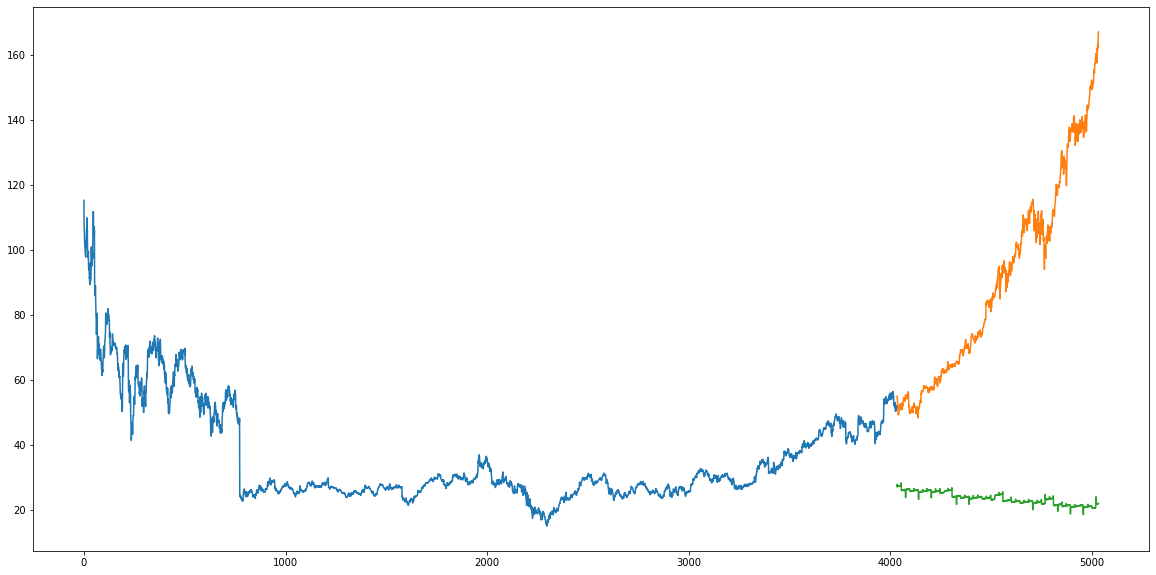

In [39]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = new_data[-1000:].index
train.index = new_data[:-1000].index

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

In [58]:
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

new_data.drop('Date', axis=1, inplace=True)

#split into train and validation
train = new_data[:-1000]
valid = new_data[-1000:]

In [60]:
x_train = train.drop('Close', axis=1)
y_train = train['Close']

x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

In [66]:
train

,Close,Year,Month,Day,WeekOfYr,DayOfYr,DayOfWk,StartOfYr,EndOfYr,StartOfQtr,EndOfQtr,StartOfMth,EndOfMth,StartOfWk,EndOfWk
0,115.31,2000,1,18,3,18,2,False,False,False,False,False,False,False,False
1,107,2000,1,19,3,19,3,False,False,False,False,False,False,False,False
2,106,2000,1,20,3,20,4,False,False,False,False,False,False,False,False
3,103.75,2000,1,21,3,21,5,False,False,False,False,False,False,False,True
4,101.25,2000,1,24,4,24,1,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4028,52.29,2016,1,22,3,22,5,False,False,False,False,False,False,False,True
4029,51.79,2016,1,25,4,25,1,False,False,False,False,False,False,True,False
4030,52.17,2016,1,26,4,26,2,False,False,False,False,False,False,False,False
4031,51.22,2016,1,27,4,27,3,False,False,False,False,False,False,False,False


In [64]:
#scaling data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

In [44]:
x_valid.shape

(1000, 14)

In [67]:


#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_valid)

C:\Users\hakng\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [71]:
#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

67.91947598081053

C:\Users\hakng\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\hakng\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


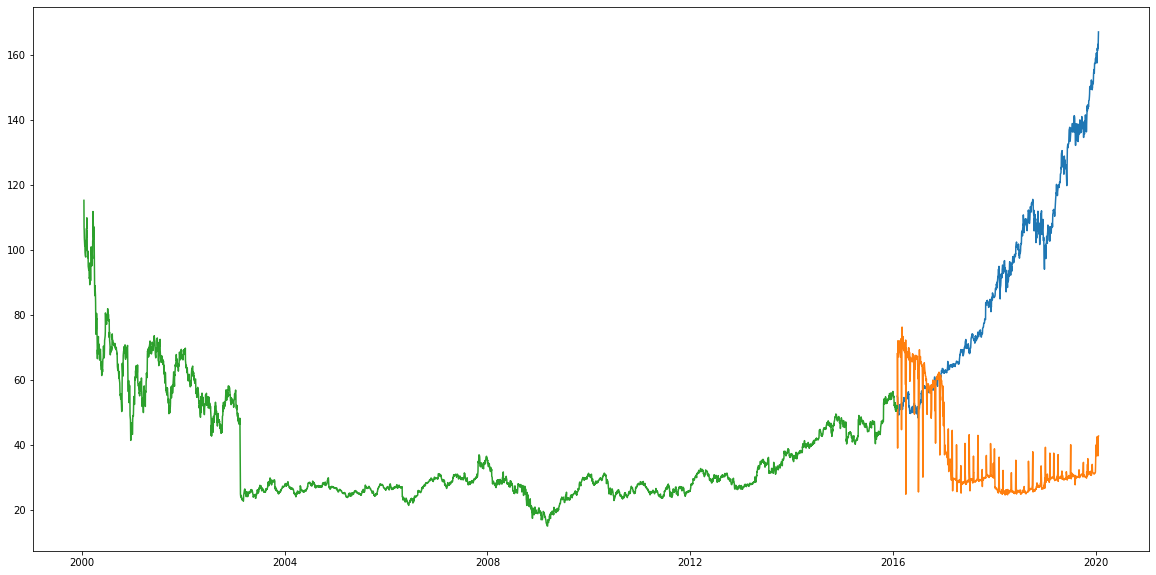

In [73]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(valid[['Close', 'Predictions']])
plt.plot(train['Close'])

In [74]:
from pmdarima.arima import auto_arima

data = df.sort_index(ascending=True, axis=0)

train = data[:-1000]
valid = data[-1000:]

training = train['Close']
validation = valid['Close']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=1000)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=11783.491, BIC=11814.986, Fit time=41.941 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=14321.456, BIC=14334.054, Fit time=0.873 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=13238.771, BIC=13263.967, Fit time=8.518 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=11779.281, BIC=11804.477, Fit time=44.483 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=14319.472, BIC=14325.771, Fit time=0.468 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=14152.688, BIC=14177.884, Fit time=22.483 seconds
Near non-invertible roots for order (1, 1, 1)(0, 1, 0, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(1

MemoryError: 

In [ ]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Prediction'])),2)))
rms